1. Countries that leads by Recovery
2. Countries that leads by Deaths
3. Countries that leads by Confirmed desease
4. Distribution of China by time
5. Distribution of Recoveries of 3 leaders by time
6. Distribution of Deaths of 3 leaders by time
7. Distribution of Confirmed desease of 3 leaders by time

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('D:/SDU/Jupyter Notebook/covid_19_clean_complete.csv')

In [9]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
25671,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/28/20,1,0,0
25672,NaN,South Sudan,6.877000,31.307000,4/28/20,34,0,0
25673,NaN,Western Sahara,24.215500,-12.885800,4/28/20,6,0,5
25674,NaN,Sao Tome and Principe,0.186360,6.613081,4/28/20,8,0,4


In [10]:
#ddates = [i for i in range(len(df['Date'].unique()))]


df_country = df.groupby(['Country/Region'], as_index = False)


mean_recovered = df_country.aggregate({'Recovered': 'max'})['Recovered'].mean()
mean_deaths = df_country.aggregate({'Deaths': 'max'})['Deaths'].mean()
mean_confirmed = df_country.aggregate({'Confirmed': 'max'})['Confirmed'].mean()


values_recovered = df_country.aggregate({'Recovered': 'max'})
values_confirmed = df_country.aggregate({'Confirmed': 'max'})
values_deaths = df_country.aggregate({'Deaths': 'max'})


df_recovered_mta = values_recovered.query('Recovered > @mean_recovered') # mta - more than average
df_deaths_mta = values_deaths.query('Deaths > @mean_deaths')
df_confirmed_mta = values_confirmed.query('Confirmed > @mean_confirmed')


def defining_raise(array):
    some_list = []
    for i in range(len(array)):
        if i == 0:
            some_list.append(array[0])
        else:
            some_list.append(array[i] - array[i-1])
    return some_list


list_of_countries = ['China','Italy','US', 'Germany', 'Spain']
list_of_cases = ['Recovered', 'Deaths', 'Confirmed']

def defining_values(list_of_countries):
    for i in list_of_countries:
        df_of_country = df[df['Country/Region'] == '{}'.format(i)]
        for i in list_of_cases:
            array_values = df_of_country.groupby(['Country/Region','Date'], as_index = False)['{0}'.format(i)]\
            .sum()['{0}'.format(i)].sort_values().values
            yield array_values
        
gen = defining_values(list_of_countries)
china_recovered, china_deaths, china_confirmed = next(gen), next(gen), next(gen)
italy_recovered, italy_deaths, italy_confirmed = next(gen), next(gen), next(gen)
us_recovered, us_deaths, us_confirmed = next(gen), next(gen), next(gen)
germany_recovered, germany_deaths, germany_confirmed = next(gen), next(gen), next(gen)
spain_recovered, spain_deaths, spain_confirmed = next(gen), next(gen), next(gen)


china_recovered_raise, china_deaths_raise, china_confirmed_raise = defining_raise(china_recovered), defining_raise(china_deaths), defining_raise(china_confirmed)
italy_recovered_raise, italy_deaths_raise, italy_confirmed_raise = defining_raise(italy_recovered), defining_raise(italy_deaths), defining_raise(italy_confirmed)
us_recovered_raise, us_deaths_raise, us_confirmed_raise = defining_raise(us_recovered), defining_raise(us_deaths), defining_raise(us_confirmed)
germany_recovered_raise, germany_deaths_raise, germany_confirmed_raise = defining_raise(germany_recovered), defining_raise(germany_deaths), defining_raise(germany_confirmed)
spain_recovered_raise, spain_deaths_raise, spain_confirmed_raise = defining_raise(spain_recovered), defining_raise(spain_deaths), defining_raise(spain_confirmed)

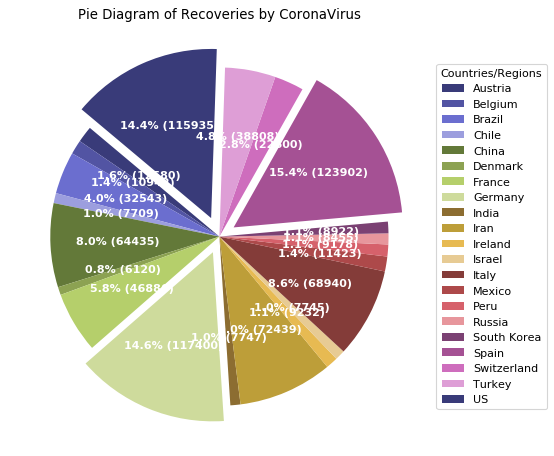

In [11]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_recovered_mta['Recovered']
categories = df_recovered_mta['Country/Region']
explode = list(np.zeros(len(data)))
listed = list(sorted(data))[-3:]
explode[list(data).index(listed[0])] = 0.12
explode[list(data).index(listed[1])] = 0.1
explode[list(data).index(listed[2])] = 0.1

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20b.colors,
                                 startangle=140,
                                 explode = explode)

# Decoration
ax.legend(wedges, categories, title="Countries/Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700); # like a font
ax.set_title("Pie Diagram of Recoveries by CoronaVirus")
plt.show()

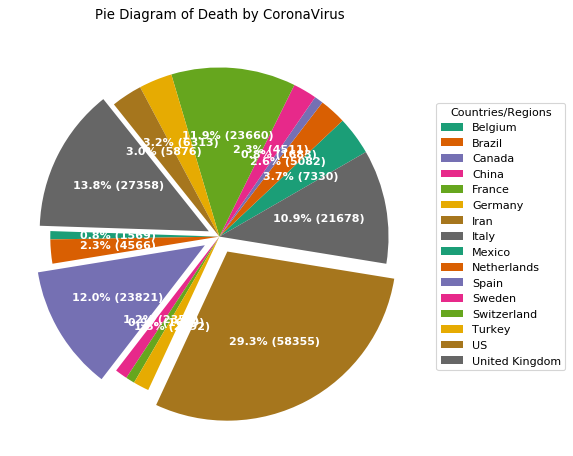

In [12]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_deaths_mta['Deaths']
categories = df_deaths_mta['Country/Region']
explode = list(np.zeros(len(data)))
listed = list(sorted(data))[-3:]
explode[list(data).index(listed[0])] = 0.1
explode[list(data).index(listed[1])] = 0.07
explode[list(data).index(listed[2])] = 0.1


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=30,
                                 explode = explode)

# Decoration
ax.legend(wedges, categories, title="Countries/Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Pie Diagram of Death by CoronaVirus")
plt.show()

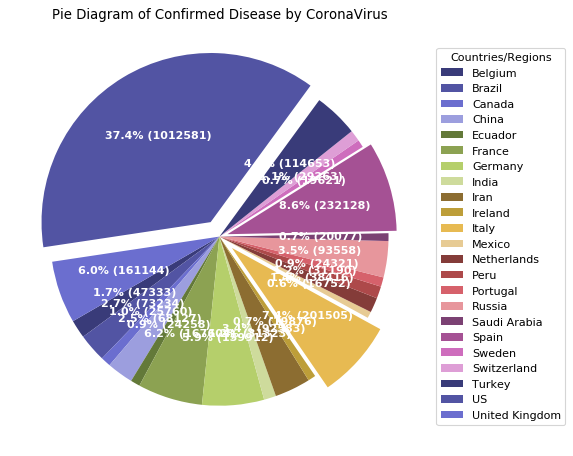

In [13]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_confirmed_mta['Confirmed']
categories = df_confirmed_mta['Country/Region']
explode = list(np.zeros(len(data)))
listed = list(sorted(data))[-3:]
explode[list(data).index(listed[0])] = 0.1
explode[list(data).index(listed[1])] = 0.05
explode[list(data).index(listed[2])] = 0.1

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20b.colors,
                                 startangle=210,
                                 explode = explode)

# Decoration
ax.legend(wedges, categories, title="Countries/Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Pie Diagram of Confirmed Disease by CoronaVirus")
plt.show()

Top 3 Recoveries:

1) Germany
2) Spain
3) US

Top 3 Deaths:

1) US
2) Italy
3) Spain

Top 3 Confirmed:

1) US
2) Spain
3) Italy

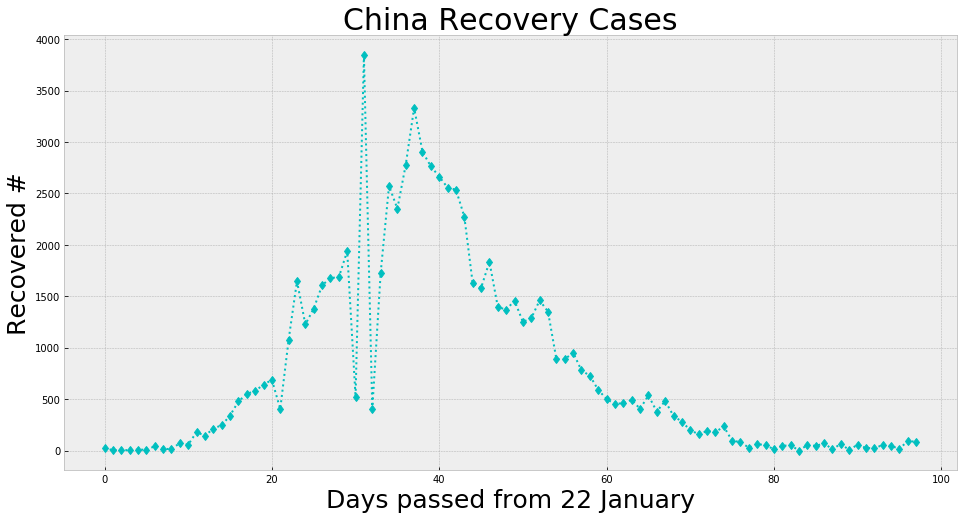

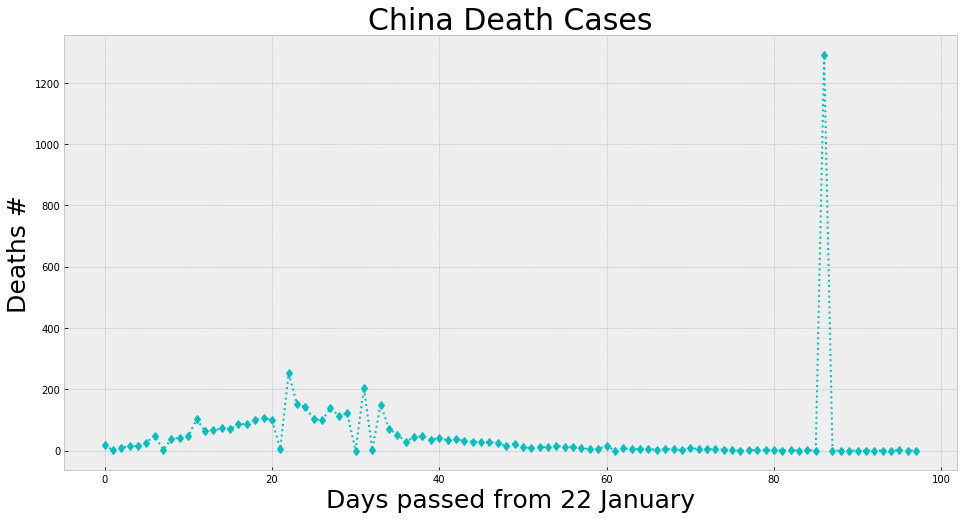

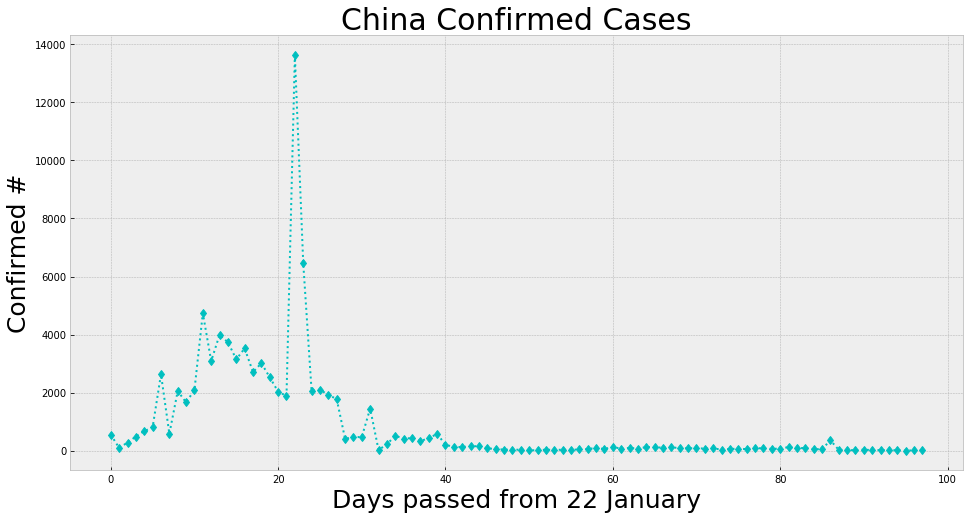

In [14]:


########################################################## CHINA ##########################################################


plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(china_recovered_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Recovered #', fontsize = 25)
plt.title('China Recovery Cases', fontsize = 30)
plt.show()

#### #### #### Recovery #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(china_deaths_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Deaths #', fontsize = 25)
plt.title('China Death Cases', fontsize = 30)
plt.show()

#### #### #### Deaths #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(china_confirmed_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Confirmed #', fontsize = 25)
plt.title('China Confirmed Cases', fontsize = 30)
plt.show()

#### #### #### Confirmed #### #### ####

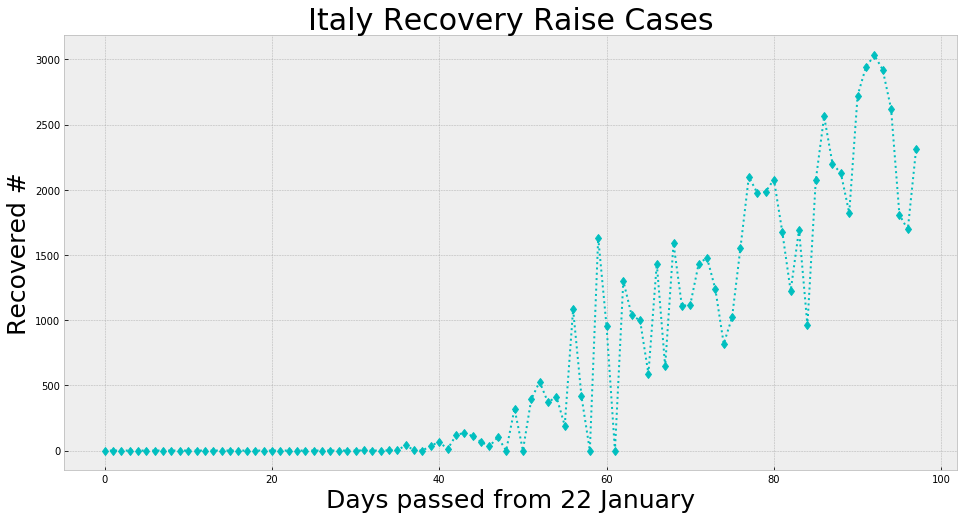

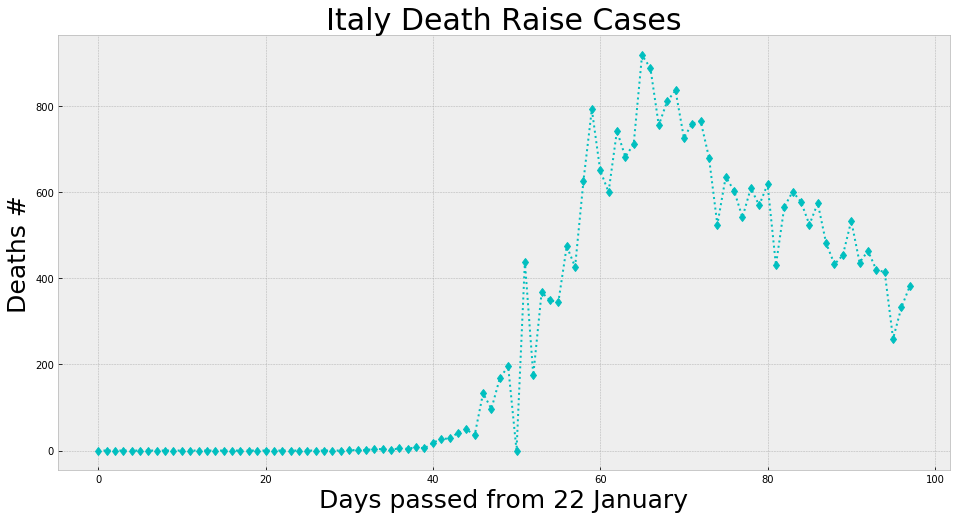

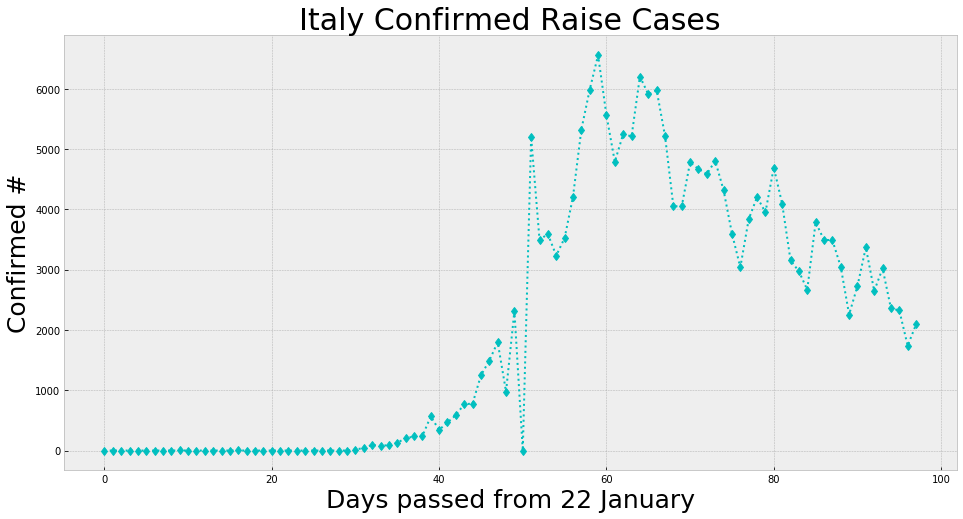

In [15]:


########################################################## Italy ##########################################################


plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(italy_recovered_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Recovered #', fontsize = 25)
plt.title('Italy Recovery Raise Cases', fontsize = 30)
plt.show()

#### #### #### Recovery #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(italy_deaths_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Deaths #', fontsize = 25)
plt.title('Italy Death Raise Cases', fontsize = 30)
plt.show()

#### #### #### Deaths #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(italy_confirmed_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Confirmed #', fontsize = 25)
plt.title('Italy Confirmed Raise Cases', fontsize = 30)
plt.show()

#### #### #### Confirmed #### #### ####

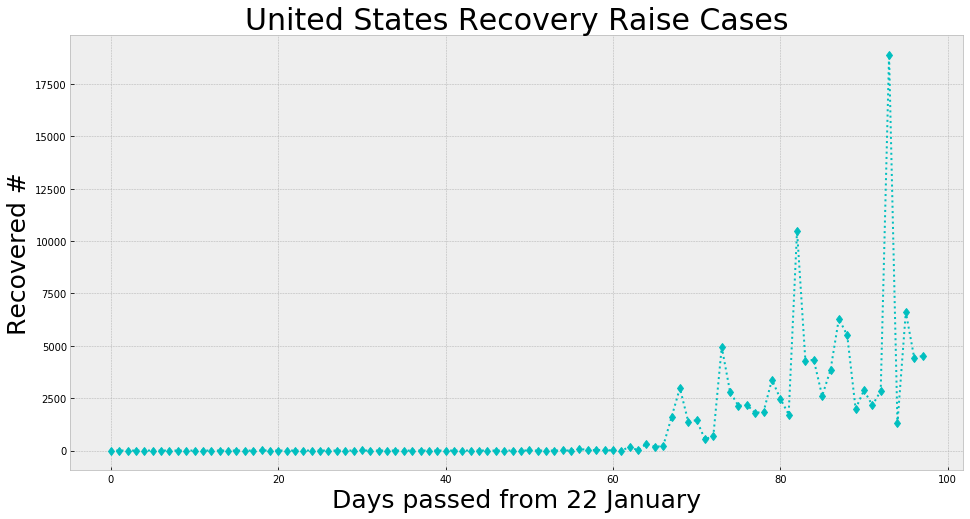

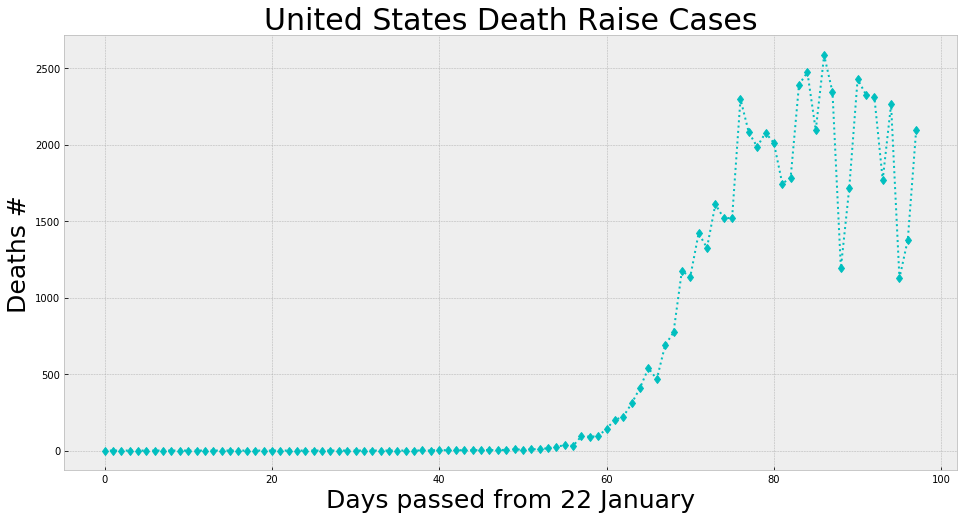

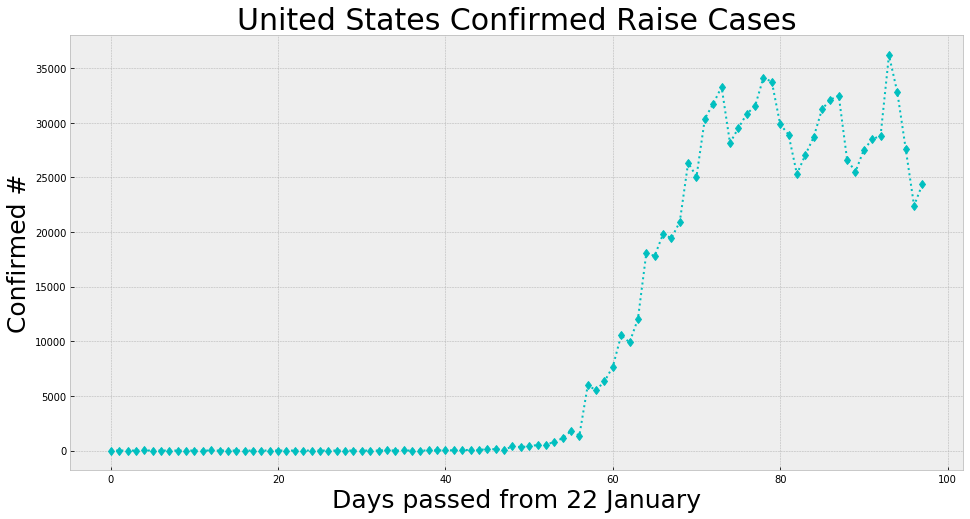

In [16]:


########################################################## US ##########################################################


plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(us_recovered_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Recovered #', fontsize = 25)
plt.title('United States Recovery Raise Cases', fontsize = 30)
plt.show()

#### #### #### Recovery #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(us_deaths_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Deaths #', fontsize = 25)
plt.title('United States Death Raise Cases', fontsize = 30)
plt.show()

#### #### #### Deaths #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(us_confirmed_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Confirmed #', fontsize = 25)
plt.title('United States Confirmed Raise Cases', fontsize = 30)
plt.show()

#### #### #### Confirmed #### #### ####

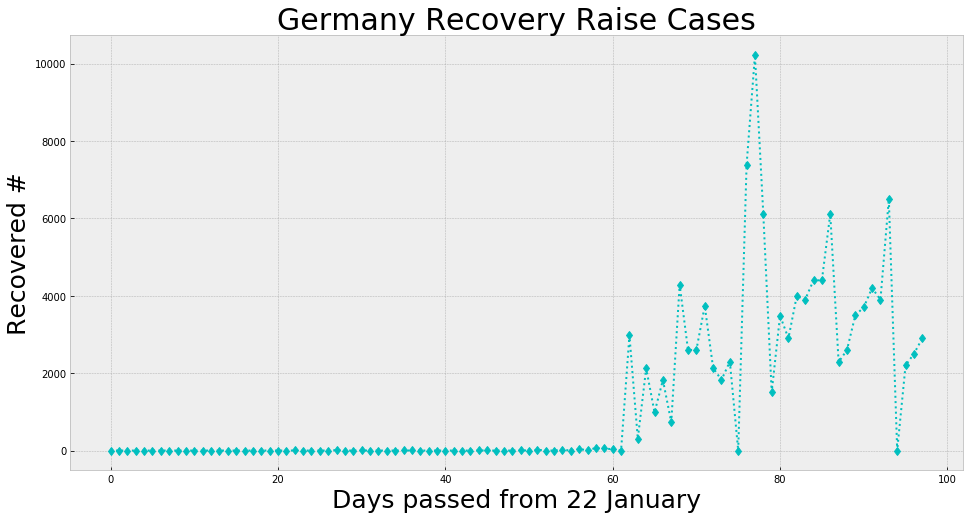

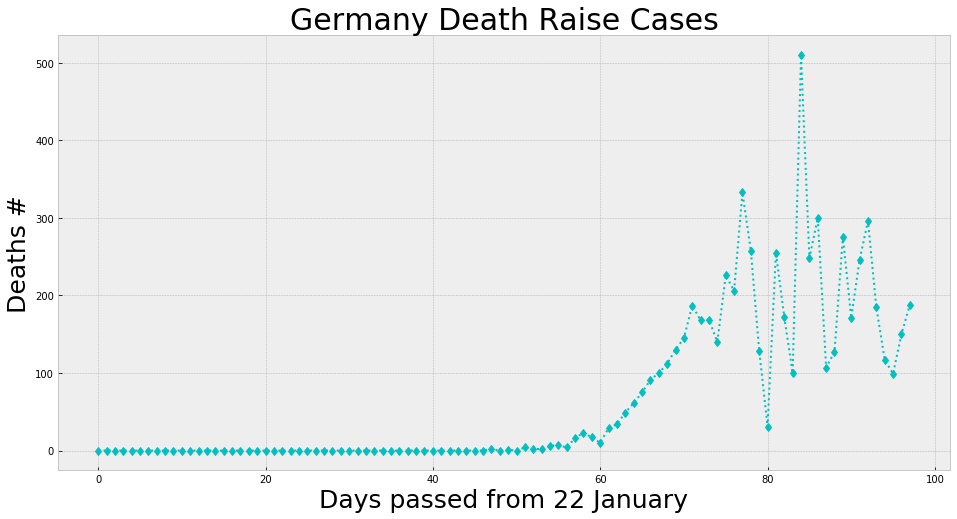

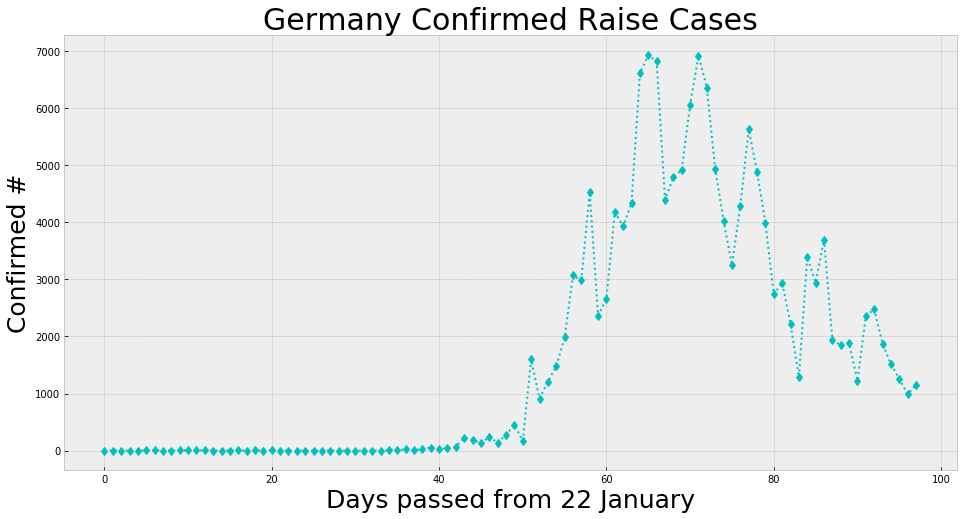

In [17]:


######################################################## GERMANY #########################################################


plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(germany_recovered_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Recovered #', fontsize = 25)
plt.title('Germany Recovery Raise Cases', fontsize = 30)
plt.show()

#### #### #### Recovery #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(germany_deaths_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Deaths #', fontsize = 25)
plt.title('Germany Death Raise Cases', fontsize = 30)
plt.show()

#### #### #### Deaths #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(germany_confirmed_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Confirmed #', fontsize = 25)
plt.title('Germany Confirmed Raise Cases', fontsize = 30)
plt.show()

#### #### #### Confirmed #### #### ####

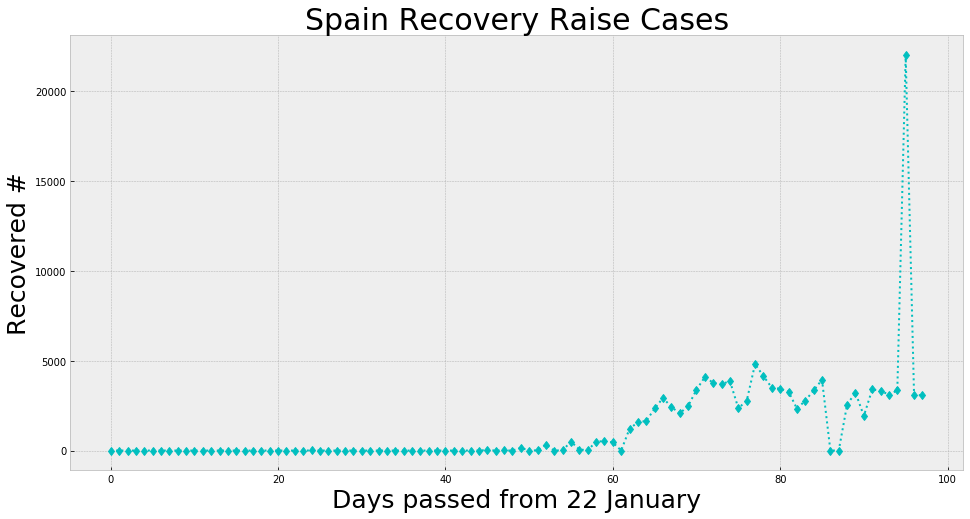

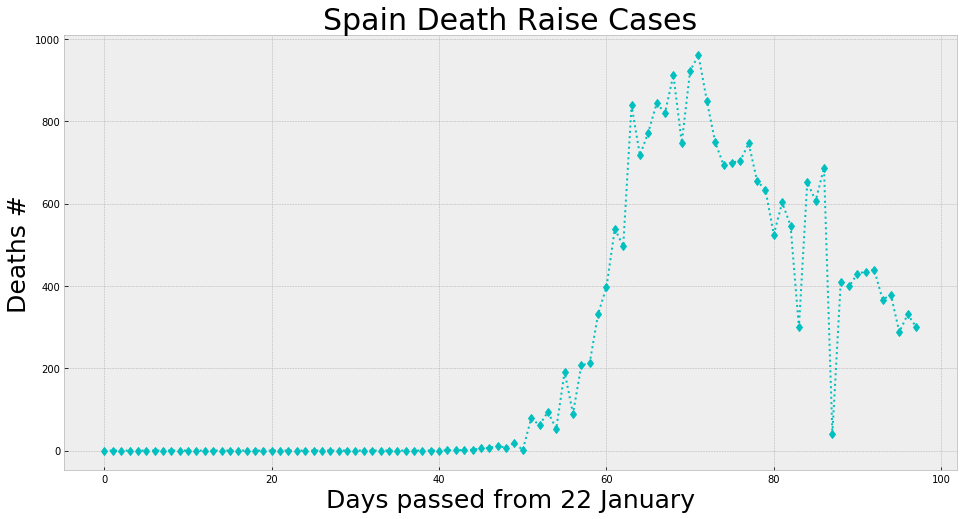

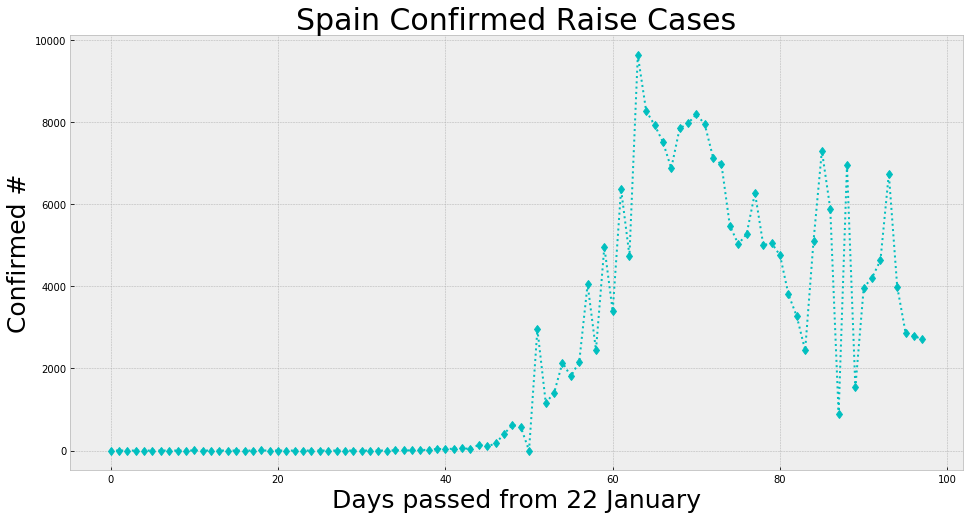

In [18]:


######################################################## SPAIN #########################################################


plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(spain_recovered_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Recovered #', fontsize = 25)
plt.title('Spain Recovery Raise Cases', fontsize = 30)
plt.show()

#### #### #### Recovery #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(spain_deaths_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Deaths #', fontsize = 25)
plt.title('Spain Death Raise Cases', fontsize = 30)
plt.show()

#### #### #### Deaths #### #### ####

plt.style.use('bmh')
plt.figure(figsize = (16,8))
plt.plot(spain_confirmed_raise, 'c', marker = 'd', linestyle = ':')
plt.xlabel('Days passed from 22 January', fontsize =25)
plt.ylabel('Confirmed #', fontsize = 25)
plt.title('Spain Confirmed Raise Cases', fontsize = 30)
plt.show()

#### #### #### Confirmed #### #### ####